In [140]:
import csv
import pandas as pd
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [141]:
data = pd.read_csv("cleaned_df.csv",index_col=None)

In [142]:
data

,IncidentID,IncidentType,CaseNumber,Suspect,Arrested,Address,Victim,Details,ReleasedBy,Day,Month,Year,Hour
0,7400,Assist Outside Agency,2005-13680 ...,NaN,...,"700 Block of E. Washington Ave., Madison, Wisc...",...,On 2/6/05 at approximately 10:33 p.m. Officer ...,Mike Hanson,7,10,2005,4
1,7401,Arrested Person,2005-22647 ...,NaN,"Tony R Markovitch, 20 years old, 301 Knutson D...","First St & E Washington Ave, Madison, Wisconsin",n/a ...,"At approximately 11:42 pm, an officer noted a ...",Lt Pat Malloy,3,3,2005,6
2,7402,Arrested Person,2005-22345 ...,NaN,Martell D. Britton m/b 05-03-85\r\r\nCharge: ...,"8 New Berm Court, Madison, Wisconsin",Home Depot ...,"On 03/02/2005 at approximately 8:15 am, the Ma...",Lt. T. Peterson,2,3,2005,15
3,7403,Arrested Person,2005-22688 ...,NaN,"Twainesse L Peavy, 26 yrs old, 2317 Fish Hatch...","4300 Lumley Rd, Madison, Wisconsin",Adult male resident of Madison ...,"At approximately 7:30 am this date, Officers r...",Lt. Pat Malloy,3,3,2005,14
4,7404,Information,2005-999999 ...,NaN,...,"211 S. Carroll Street, Madison, Wisconsin",...,DELIVERY NOTICES FOR UNPAID PARKING TICKETS\r\...,Lieutenant Joe Balles,4,3,2005,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14131,28608,Robbery,2021-410423,"Male described as 6 feet tall, slender, with a...",NaN,"3700 Frosted Leaf Dr, Madison, Wisconsin",NaN,Madison Police officers were dispatched to the...,Lt. Michael Richardson,12,10,2021,7
14132,28609,Attempted Homicide,2021-407981,NaN,Tokiee D. Sole,"5800 block Balsam Rd, Madison, Wisconsin",NaN,"On 10/10/2021 at approximately 3:50 a.m., Madi...",P.O. Hunter Lisko,10,10,2021,9
14133,28610,Information,2021-411747,NaN,NaN,"Esker Trl/Lilyview Ln, Madison, Wisconsin",NaN,"On October 12th, 2021 at approximately 6:43 PM...",PIO Julie Laundrie,12,10,2021,24
14134,28611,Fight (In Progress),2021-412832,NaN,"Aaron Mixon, 24-year-old\r\n\r\nNathan Dougher...","200 N First St, Madison, Wisconsin",NaN,Madison Police Officers responded to 200 N Fir...,P.O. Ryan Kimberley,13,10,2021,22


In [143]:
data['my_dates'] = pd.to_datetime(data[['Year','Month', 'Day']])

data['day_of_week'] = data['my_dates'].dt.day_name()

# data['weekday'] = datetime.date(data['Year','Month', 'Day'])

In [148]:
is_rob=data['IncidentType']=="Robbery"
rob= data[is_rob]
rob=rob[['Hour','day_of_week','IncidentType']]
rob

,Hour,day_of_week,IncidentType
975,1,Thursday,Robbery
1393,21,Wednesday,Robbery
1409,19,Monday,Robbery
1425,4,Thursday,Robbery
1426,24,Wednesday,Robbery
...,...,...,...
14082,17,Monday,Robbery
14091,15,Thursday,Robbery
14103,1,Wednesday,Robbery
14105,6,Friday,Robbery


In [152]:
new=rob.groupby(['Hour','day_of_week'])["IncidentType"].count().unstack()
new

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Hour,,,,,,,
0,11,8,9,12,6,11,14
1,12,10,19,15,31,30,23
2,20,26,24,26,29,33,26
3,25,39,28,25,20,31,37
4,22,26,20,24,21,33,40
5,12,24,32,25,26,33,37
6,19,21,19,29,19,24,18
7,23,9,23,26,17,19,15
8,16,14,28,40,11,10,12


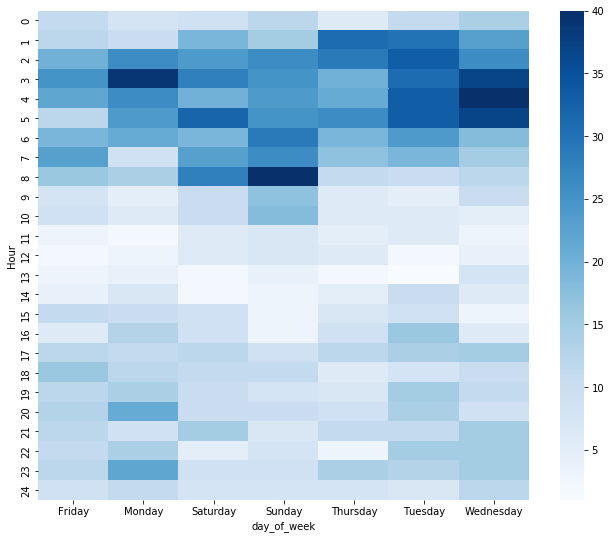

In [155]:
fig, ax = plt.subplots(figsize=(11, 9))
sb.heatmap(new,cmap="Blues")
plt.show()

In [156]:
is_vio=data['IncidentType']=="Weapons Violation"
vio= data[is_vio]
vio=vio[['Hour','day_of_week','IncidentType']]
vio

,Hour,day_of_week,IncidentType
1403,22,Thursday,Weapons Violation
1415,14,Thursday,Weapons Violation
1436,7,Friday,Weapons Violation
1444,9,Thursday,Weapons Violation
1445,10,Thursday,Weapons Violation
...,...,...,...
14126,7,Saturday,Weapons Violation
14127,4,Sunday,Weapons Violation
14128,4,Sunday,Weapons Violation
14129,6,Sunday,Weapons Violation


In [157]:
new1=vio.groupby(['Hour','day_of_week'])["IncidentType"].count().unstack()
new1

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Hour,,,,,,,
0,7.0,5.0,4.0,6.0,10.0,5.0,9.0
1,14.0,13.0,14.0,17.0,14.0,17.0,16.0
2,15.0,20.0,18.0,17.0,27.0,23.0,20.0
3,17.0,26.0,21.0,21.0,20.0,22.0,15.0
4,26.0,17.0,35.0,30.0,20.0,17.0,25.0
5,24.0,14.0,31.0,22.0,26.0,16.0,18.0
6,22.0,20.0,24.0,37.0,21.0,15.0,10.0
7,15.0,13.0,34.0,33.0,15.0,14.0,6.0
8,15.0,8.0,28.0,45.0,14.0,10.0,9.0


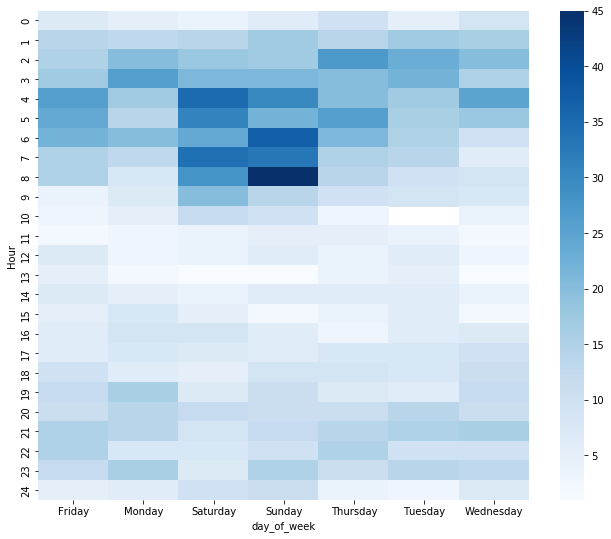

In [158]:
fig, ax = plt.subplots(figsize=(11, 9))
sb.heatmap(new1,cmap="Blues")
plt.show()

In [159]:
is_bat=data['IncidentType']=="Battery"
bat= data[is_bat]
bat=bat[['Hour','day_of_week','IncidentType']]
bat

,Hour,day_of_week,IncidentType
64,23,Sunday,Battery
1394,2,Thursday,Battery
1402,16,Thursday,Battery
1404,4,Saturday,Battery
1420,1,Monday,Battery
...,...,...,...
13911,1,Thursday,Battery
13938,7,Sunday,Battery
14023,8,Thursday,Battery
14028,4,Monday,Battery


In [160]:
new2=bat.groupby(['Hour','day_of_week'])["IncidentType"].count().unstack()
new2

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Hour,,,,,,,
0,3.0,2.0,3.0,6.0,8.0,6.0,4.0
1,7.0,8.0,4.0,11.0,4.0,11.0,7.0
2,7.0,8.0,8.0,6.0,8.0,2.0,9.0
3,7.0,4.0,5.0,11.0,5.0,8.0,3.0
4,4.0,9.0,5.0,7.0,5.0,4.0,5.0
5,9.0,6.0,15.0,23.0,6.0,6.0,7.0
6,9.0,4.0,23.0,30.0,8.0,5.0,10.0
7,27.0,8.0,32.0,31.0,7.0,9.0,17.0
8,10.0,6.0,28.0,32.0,9.0,3.0,4.0


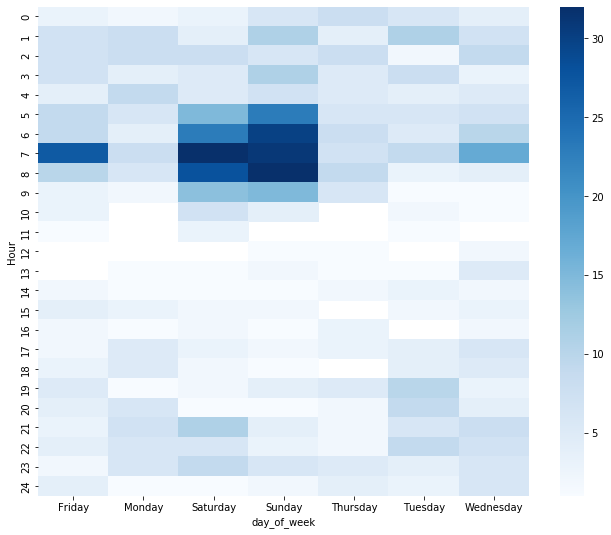

In [161]:
fig, ax = plt.subplots(figsize=(11, 9))
sb.heatmap(new2,cmap="Blues")
plt.show()

In [162]:
is_thef=data['IncidentType']=="Theft"
thef= data[is_thef]
thef=thef[['Hour','day_of_week','IncidentType']]
thef

,Hour,day_of_week,IncidentType
1487,13,Saturday,Theft
1490,19,Monday,Theft
1495,13,Wednesday,Theft
1517,20,Wednesday,Theft
1526,17,Saturday,Theft
...,...,...,...
14055,22,Friday,Theft
14058,17,Sunday,Theft
14059,5,Monday,Theft
14096,2,Monday,Theft


In [165]:
new3=thef.groupby(['Hour','day_of_week'])["IncidentType"].count().unstack()
new3

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Hour,,,,,,,
0,3.0,2.0,3.0,4.0,1.0,1.0,5.0
1,3.0,1.0,6.0,5.0,5.0,2.0,2.0
2,7.0,3.0,2.0,5.0,3.0,6.0,4.0
3,3.0,2.0,5.0,3.0,6.0,5.0,2.0
4,2.0,3.0,1.0,4.0,3.0,6.0,3.0
5,3.0,4.0,1.0,3.0,5.0,4.0,3.0
6,3.0,4.0,NaN,1.0,2.0,5.0,4.0
7,2.0,4.0,NaN,7.0,6.0,2.0,4.0
8,4.0,5.0,NaN,6.0,4.0,2.0,2.0


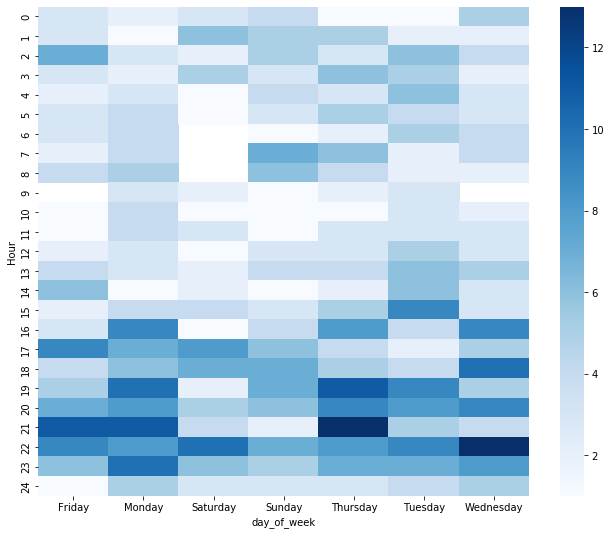

In [166]:
fig, ax = plt.subplots(figsize=(11, 9))
sb.heatmap(new3,cmap="Blues")
plt.show()